In [1]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, f1_score, confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold
from imblearn.over_sampling import SMOTE

In [2]:
#Data
print(os.getcwd())

data_dir = os.getcwd() + "\\Kaggle\\Dataset_TBI.xlsx"
print(data_dir)

F:\CTSN_TBI\Machine_learning\GBM algorithm
F:\CTSN_TBI\Machine_learning\GBM algorithm\Kaggle\Dataset_TBI.xlsx


In [3]:
df_tbi = pd.read_excel(data_dir,index_col=0)
df_tbi.head()

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
Subject,,,,,,,,,,,,,,,,,
S1,76,M,V,MCS,10.0,3,18,-175,0,3,DEATH,NaN,NaN,30.0,NaN,NaN,1
S2,28,M,III,MCS,8.0,3,20,-125,0,2,EMERSION,23.0,7.0,8.0,0.0,60.0,4
S3,20,F,II,MCS,9.0,3,18,-175,0,2,EMERSION,23.0,7.0,6.0,0.0,70.0,4
S4,22,M,II,EMERSION,23.0,4,15,-175,0,3,EMERSION,23.0,7.0,3.0,0.0,100.0,7
S5,62,M,II,EMERSION,23.0,4,15,-100,5,3,EMERSION,23.0,6.0,10.0,-50.0,90.0,3


### Data exploration

In [4]:
df_tbi = pd.read_excel(data_dir)
df_tbi1 = df_tbi.drop("Subject", axis = 1)
df_tbi.info()
df_tbi.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Subject                      102 non-null    object 
 1   Age                          102 non-null    int64  
 2   Sex                          102 non-null    object 
 3   Marshall (t0)                99 non-null     object 
 4   Entry Diagnosis (t0)         102 non-null    object 
 5   CRS-R (t1)                   101 non-null    float64
 6   RLAS (t1)                    102 non-null    int64  
 7   DRS (t1)                     102 non-null    int64  
 8   ERBI A (t1)                  102 non-null    int64  
 9   ERBI B (t1)                  102 non-null    int64  
 10  GOS-E (t1)                   102 non-null    int64  
 11  Diagnosis at Discharge (t2)  102 non-null    object 
 12  CRS-R (t2)                   90 non-null     float64
 13  RLAS (t2)           

Index(['Subject', 'Age', 'Sex', 'Marshall (t0)', 'Entry Diagnosis (t0)',
       'CRS-R (t1)', 'RLAS (t1)', 'DRS (t1)', 'ERBI A (t1)', 'ERBI B (t1)',
       'GOS-E (t1)', 'Diagnosis at Discharge (t2)', 'CRS-R (t2)', 'RLAS (t2)',
       'DRS (t2)', 'ERBI A (t2)', 'ERBI B (t2)', 'GOS-E (t2)'],
      dtype='object')

In [5]:
null_df = pd.DataFrame(df_tbi.isnull().sum())
null_df[null_df[0]>0]

,0
Marshall (t0),3
CRS-R (t1),1
CRS-R (t2),12
RLAS (t2),12
DRS (t2),2
ERBI A (t2),12
ERBI B (t2),12


In [6]:
# features = list(df_tbi_full.columns)
# plt.figure(figsize=(30,25))
# for i in range(18):
#     plt.subplot(6, 3, i+1)
#     plt.title(features[i])
#     df_tbi[features[i]].hist()
# plt.savefig('Histogram feature')

In [7]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(df_tbi_full, figsize=(25,25))

In [8]:
# cor = df_tbi_full.corr()
# plt.figure(figsize = (12,6))
# sns.heatmap(cor, annot = True)
# plt.savefig('Correlation feature')

## Data processing

### 4 class

In [9]:
df_tbi4 = df_tbi.copy()

In [10]:
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 1 if 1 <= x <= 2 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 3 if 3 <= x <= 4 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 2 if 5 <= x <= 6 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 4 if 7 <= x <= 8 else x)

In [11]:
df_tbi4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Subject                      102 non-null    object 
 1   Age                          102 non-null    int64  
 2   Sex                          102 non-null    object 
 3   Marshall (t0)                99 non-null     object 
 4   Entry Diagnosis (t0)         102 non-null    object 
 5   CRS-R (t1)                   101 non-null    float64
 6   RLAS (t1)                    102 non-null    int64  
 7   DRS (t1)                     102 non-null    int64  
 8   ERBI A (t1)                  102 non-null    int64  
 9   ERBI B (t1)                  102 non-null    int64  
 10  GOS-E (t1)                   102 non-null    int64  
 11  Diagnosis at Discharge (t2)  102 non-null    object 
 12  CRS-R (t2)                   90 non-null     float64
 13  RLAS (t2)           

In [12]:
df_tbi4["GOS-E (t2)"].value_counts()

3    38
4    29
1    26
2     9
Name: GOS-E (t2), dtype: int64

In [13]:
df_tbi4["Marshall (t0)"].value_counts()

V      41
II     36
III    19
IV      2
VI      1
Name: Marshall (t0), dtype: int64

In [14]:
df_tbi4["Entry Diagnosis (t0)"].value_counts()

EMERSION     56
VS           24
MCS          21
EMERSION      1
Name: Entry Diagnosis (t0), dtype: int64

In [15]:
df_tbi4["Diagnosis at Discharge (t2)"].value_counts()

EMERSION     74
DEATH        12
MCS           9
VS            5
MERSIONE      1
EMERSION      1
Name: Diagnosis at Discharge (t2), dtype: int64

## Encoding

In [16]:
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

In [17]:
mapping = {
    'II': '2',
    'III': '3',
    'IV': '4',
    'V': '5',
    'VI': '6'}
df_tbi4['Marshall (t0)'] = df_tbi4['Marshall (t0)'].replace(mapping)

#### Label encoding

In [18]:
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df_tbi4['Sex']= label_encoder.fit_transform(df_tbi4['Sex']) 
df_tbi4['Entry Diagnosis (t0)']= label_encoder.fit_transform(df_tbi4['Entry Diagnosis (t0)'])
df_tbi4['Diagnosis at Discharge (t2)']= label_encoder.fit_transform(df_tbi4['Diagnosis at Discharge (t2)'])
df_tbi4x= df_tbi4.drop('Subject', 1, errors='ignore')

df_tbi4x.head() 

C:\Users\HANGO\AppData\Local\Temp\ipykernel_8616\3641519914.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_tbi4x= df_tbi4.drop('Subject', 1, errors='ignore')


,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,76,1,5,2,10.0,3,18,-175,0,3,0,NaN,NaN,30.0,NaN,NaN,1
1,28,1,3,2,8.0,3,20,-125,0,2,1,23.0,7.0,8.0,0.0,60.0,3
2,20,0,2,2,9.0,3,18,-175,0,2,1,23.0,7.0,6.0,0.0,70.0,3
3,22,1,2,0,23.0,4,15,-175,0,3,1,23.0,7.0,3.0,0.0,100.0,4
4,62,1,2,0,23.0,4,15,-100,5,3,1,23.0,6.0,10.0,-50.0,90.0,3


In [19]:
scaler = StandardScaler()
df_new_tbi_target = df_tbi['GOS-E (t2)']
df_new_array = scaler.fit_transform(df_tbi4x)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f.columns = df_tbi4x.columns.to_list()
df_tbi_f

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,1.380828,0.630286,1.087012,0.673219,-0.818321,-0.585028,-0.156150,-0.295498,-0.251339,0.853706,-1.149958,NaN,NaN,2.075281,NaN,NaN,-1.482538
1,-0.960077,0.630286,-0.377127,0.673219,-1.074205,-0.585028,0.305510,0.381824,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.498348,0.452267,0.106384,0.275821
2,-1.350228,-1.586582,-1.109196,0.673219,-0.946263,-0.585028,-0.156150,-0.295498,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.732315,0.452267,0.368701,0.275821
3,-1.252690,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,-0.295498,-0.251339,0.853706,-0.261354,0.427507,0.682187,-1.083264,0.452267,1.155651,1.155001
4,0.698064,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,0.720485,1.030489,0.853706,-0.261354,0.427507,0.080257,-0.264382,-0.452267,0.893335,0.275821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-1.398997,-1.586582,-1.109196,-0.869890,0.844923,1.927514,-1.310300,1.397807,-0.251339,0.853706,-0.261354,0.427507,1.284116,-1.434213,0.452267,1.155651,1.155001
98,1.868516,0.630286,1.087012,-0.869890,0.844923,0.671243,-0.156150,0.720485,-0.251339,0.853706,-0.261354,0.427507,-0.521672,0.671483,0.452267,-1.467517,0.275821
99,1.380828,0.630286,-1.109196,-0.869890,0.844923,1.299378,-0.156150,2.075130,-0.251339,0.853706,-0.261354,0.427507,0.682187,0.203551,0.452267,-0.680566,0.275821
100,-1.252690,0.630286,1.087012,-0.869890,0.844923,1.927514,-2.464451,2.075130,2.312317,0.853706,-0.261354,0.427507,0.682187,-0.615331,0.452267,-1.336358,0.275821


In [20]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_tbi5 = pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df_tbi5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          102 non-null    float64
 1   Sex                          102 non-null    float64
 2   Marshall (t0)                102 non-null    float64
 3   Entry Diagnosis (t0)         102 non-null    float64
 4   CRS-R (t1)                   102 non-null    float64
 5   RLAS (t1)                    102 non-null    float64
 6   DRS (t1)                     102 non-null    float64
 7   ERBI A (t1)                  102 non-null    float64
 8   ERBI B (t1)                  102 non-null    float64
 9   GOS-E (t1)                   102 non-null    float64
 10  Diagnosis at Discharge (t2)  102 non-null    float64
 11  CRS-R (t2)                   102 non-null    float64
 12  RLAS (t2)                    102 non-null    float64
 13  DRS (t2)            

In [21]:
df_tbi5x= df_tbi5.drop('GOS-E (t2)', 1, errors='ignore')
df_tbi5x.head()

C:\Users\HANGO\AppData\Local\Temp\ipykernel_8616\3779281919.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_tbi5x= df_tbi5.drop('GOS-E (t2)', 1, errors='ignore')


,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2)
0,1.380828,0.630286,1.087012,0.673219,-0.818321,-0.585028,-0.15615,-0.295498,-0.251339,0.853706,-1.149958,-0.113232,-0.762444,2.075281,0.180907,-0.916652
1,-0.960077,0.630286,-0.377127,0.673219,-1.074205,-0.585028,0.30551,0.381824,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.498348,0.452267,0.106384
2,-1.350228,-1.586582,-1.109196,0.673219,-0.946263,-0.585028,-0.15615,-0.295498,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.732315,0.452267,0.368701
3,-1.252690,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.84864,-0.295498,-0.251339,0.853706,-0.261354,0.427507,0.682187,-1.083264,0.452267,1.155651
4,0.698064,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.84864,0.720485,1.030489,0.853706,-0.261354,0.427507,0.080257,-0.264382,-0.452267,0.893335


In [ ]:
X = df_tbi5x["Marshall (t0)"]
#X=(df_tbi4x.iloc[:,1:]).drop(columns=["GOS-E (t2)"]) # Features
y = df_tbi4["GOS-E (t2)"]   # Target variable
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform Leave-One-Out Cross-Validation
# loo = LeaveOneOut()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store true and predicted labels
# List to store accuracies
accuracies = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to balance the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
   # Train the Random Forest model
    rf_model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    
    # Compute accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Compute the mean accuracy
mean_accuracy = sum(accuracies) / len(accuracies)

print("Mean Accuracy:", mean_accuracy)

Feature ranking:
1. Feature 'CRS-R (t2)' (0.410600)
2. Feature 'DRS (t2)' (0.343844)
3. Feature 'ERBI B (t2)' (0.076177)
4. Feature 'Age' (0.065735)
5. Feature 'ERBI A (t1)' (0.040918)
6. Feature 'RLAS (t2)' (0.016632)
7. Feature 'Marshall (t0)' (0.011341)
8. Feature 'Diagnosis at Discharge (t2)' (0.009594)
9. Feature 'CRS-R (t1)' (0.007862)
10. Feature 'RLAS (t1)' (0.007620)
11. Feature 'Sex' (0.004166)
12. Feature 'DRS (t1)' (0.003631)
13. Feature 'Entry Diagnosis (t0)' (0.001603)
14. Feature 'ERBI A (t2)' (0.000221)
15. Feature 'GOS-E (t1)' (0.000043)
16. Feature 'ERBI B (t1)' (0.000013)


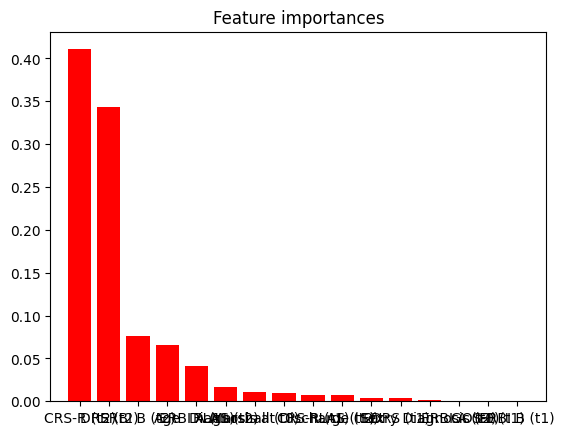

Selected features:
CRS-R (t2)
DRS (t2)
ERBI B (t2)
Age
ERBI A (t1)
RLAS (t2)
Marshall (t0)
Diagnosis at Discharge (t2)
CRS-R (t1)
RLAS (t1)
Sex
DRS (t1)
Entry Diagnosis (t0)
ERBI A (t2)
GOS-E (t1)
ERBI B (t1)
['Age', 'Sex', 'Marshall (t0)', 'Entry Diagnosis (t0)', 'CRS-R (t1)', 'RLAS (t1)', 'DRS (t1)', 'ERBI A (t1)', 'ERBI B (t1)', 'GOS-E (t1)', 'Diagnosis at Discharge (t2)', 'CRS-R (t2)', 'RLAS (t2)', 'DRS (t2)', 'ERBI A (t2)', 'ERBI B (t2)', 'GOS-E (t2)']


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

def gbm_feature_selection(X, feature_names, y):
    # Initialize Gradient Boosting Classifier
    gbm = GradientBoostingClassifier()
    
    # Fit the model
    gbm.fit(X, y)
    
    # Get feature importances
    feature_importances = gbm.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]
    
    # Print feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. Feature '%s' (%f)" % (f + 1, feature_names[indices[f]], feature_importances[indices[f]]))
    
    # Plot feature importances
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices])
    
    # Zoom in on the first 10 features
    plt.xlim([-1, X.shape[1]])
#     plt.xlim(-1, 6)  # Adjust the limit as needed
#     plt.xlim(-1, 30)  # Adjust the limit as needed
    
    plt.show()
    
    # Return indices of selected features based on importance
    return indices

# Example usage:
# Assuming df_new is your feature DataFrame and df_tbi1['d_kl_tl'] is your target variable.

# Load dataset as an example
X = df_tbi5x.values
y = df_tbi4["GOS-E (t2)"]
feature_names = df_tbi5.columns.tolist()  # Assuming feature names are column names of df_new

# Apply GBM feature selection
selected_features = gbm_feature_selection(X, feature_names, y)

# Print the selected features
print("Selected features:")
for feature_idx in selected_features:
    print(feature_names[feature_idx])
print(feature_names)


Feature ranking:
1. feature 11 (0.410549)
2. feature 13 (0.346331)
3. feature 15 (0.073008)
4. feature 0 (0.065701)
5. feature 7 (0.039914)
6. feature 12 (0.014418)
7. feature 4 (0.011565)
8. feature 10 (0.010234)
9. feature 2 (0.009699)
10. feature 5 (0.008548)
11. feature 1 (0.003942)
12. feature 6 (0.003848)
13. feature 9 (0.001884)
14. feature 14 (0.000326)
15. feature 3 (0.000020)
16. feature 8 (0.000014)


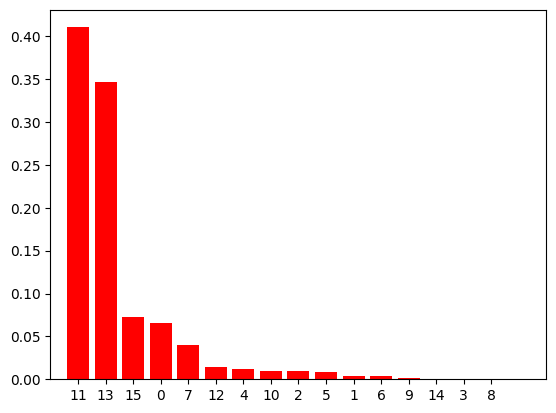

Selected features: [11 13 15  0  7 12  4 10  2  5  1  6  9 14  3  8]


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

def gbm_feature_selection(X, y):
    # Initialize Gradient Boosting Classifier
    gbm = GradientBoostingClassifier()
    
    # Fit the model
    gbm.fit(X, y)
    
    # Get feature importances
    feature_importances = gbm.feature_importances_
    
    # Sort feature importances in descending order
    indices = np.argsort(feature_importances)[::-1]
    
    # Print feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))
    
    # Plot feature importances
    plt.figure()
#     plt.title("Feature importances")
    plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    
    # Zoom in on the first 10 features
    plt.xlim(-1, 17)  # Adjust the limit as needed
    
    plt.show()
    
    # Return indices of selected features based on importance
    return indices

# Example usage:
# Assuming df_new is your feature DataFrame and df_tbi1['d_kl_tl'] is your target variable.

# Apply GBM feature selection
selected_features = gbm_feature_selection(X, y)

# Print the selected features
print("Selected features:", selected_features)


In [24]:
selected_columns = ["CRS-R (t2)", "ERBI B (t2)", "DRS (t2)", "Age", "Marshall (t0)"]  # Replace with the names of the columns you want to select
# Select the columns
df_select = df_tbi4[selected_columns]
df_select.head()

,CRS-R (t2),ERBI B (t2),DRS (t2),Age,Marshall (t0)
0,NaN,NaN,30.0,76,5
1,23.0,60.0,8.0,28,3
2,23.0,70.0,6.0,20,2
3,23.0,100.0,3.0,22,2
4,23.0,90.0,10.0,62,2


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = df_select
df_new_tbi_target = df_tbi4["GOS-E (t2)"]
df_new_array = scaler.fit_transform(df_sc)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f

,0,1,2,3,4
0,NaN,NaN,2.075281,1.380828,1.087012
1,0.427507,0.106384,-0.498348,-0.960077,-0.377127
2,0.427507,0.368701,-0.732315,-1.350228,-1.109196
3,0.427507,1.155651,-1.083264,-1.252690,-1.109196
4,0.427507,0.893335,-0.264382,0.698064,-1.109196
...,...,...,...,...,...
97,0.427507,1.155651,-1.434213,-1.398997,-1.109196
98,0.427507,-1.467517,0.671483,1.868516,1.087012
99,0.427507,-0.680566,0.203551,1.380828,-1.109196
100,0.427507,-1.336358,-0.615331,-1.252690,1.087012


In [26]:
df_tbi_f.columns = df_select.columns.to_list()
df_tbi_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRS-R (t2)     90 non-null     float64
 1   ERBI B (t2)    90 non-null     float64
 2   DRS (t2)       100 non-null    float64
 3   Age            102 non-null    float64
 4   Marshall (t0)  99 non-null     float64
dtypes: float64(5)
memory usage: 4.1 KB


In [27]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df= pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRS-R (t2)     102 non-null    float64
 1   ERBI B (t2)    102 non-null    float64
 2   DRS (t2)       102 non-null    float64
 3   Age            102 non-null    float64
 4   Marshall (t0)  102 non-null    float64
dtypes: float64(5)
memory usage: 4.1 KB


In [28]:
df.head()

,CRS-R (t2),ERBI B (t2),DRS (t2),Age,Marshall (t0)
0,-2.484163,-1.467517,2.075281,1.380828,1.087012
1,0.427507,0.106384,-0.498348,-0.960077,-0.377127
2,0.427507,0.368701,-0.732315,-1.350228,-1.109196
3,0.427507,1.155651,-1.083264,-1.252690,-1.109196
4,0.427507,0.893335,-0.264382,0.698064,-1.109196


In [29]:
X = df
#X=(df_tbi4x.iloc[:,1:]).drop(columns=["GOS-E (t2)"]) # Features
y = df_tbi4["GOS-E (t2)"]   # Target variable

In [30]:
print(y.value_counts())

3    38
4    29
1    26
2     9
Name: GOS-E (t2), dtype: int64


In [31]:
print(X.value_counts())

CRS-R (t2)  ERBI B (t2)  DRS (t2)   Age        Marshall (t0)
-3.732022   -1.467517     1.724332   1.722210   1.087012        1
 0.427507    0.499859    -0.732315  -1.301459  -1.109196        1
             0.893335    -0.849298  -0.765002  -1.109196        1
                                    -1.008846  -1.109196        1
                         -0.966281  -0.423620  -1.109196        1
                                                               ..
 0.219531   -0.155933    -0.264382  -0.862539  -0.377127        1
            -0.549408     0.320534  -1.301459   1.087012        1
            -1.467517     1.022433   0.698064   1.087012        1
 0.011554    0.893335    -0.732315  -1.398997  -1.109196        1
 0.427507    1.155651    -0.849298  -1.155152  -0.377127        1
Length: 102, dtype: int64


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, perplexity=25, random_state = 0)
tsne_data = model.fit_transform(X)
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()


In [ ]:
# from sklearn.cluster import KMeans
# # Select features for clustering (replace with your actual column names)
# features = df_tbi4x.columns
 
# # Extract the features for clustering
# X = df[features]

# # Initialize the KMeans model
# kmeans = KMeans(n_clusters=2, random_state=42)

# # Fit the model to the data
# kmeans.fit(X)

# # Add the cluster labels to the DataFrame
# df["GOS-E (t2)"] = kmeans.fit_predict(X)

# # Visualize the clusters (for 2D data only, adjust as needed)
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df["GOS-E (t2)"], cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=50, linewidths=3, color='red')
# plt.title('K-means Clustering')
# plt.xlabel(features[0])
# plt.ylabel(features[1])
# plt.show()


In [ ]:
df_tbi4x.info()

In [ ]:
# # Select features
# from sklearn.ensemble import GradientBoostingClassifier
# def gbm_feature_selection(X, y):
#     # Initialize Gradient Boosting Classifier
#     gbm = GradientBoostingClassifier()
    
#     # Fit the model
#     gbm.fit(X, y)
    
#     # Get feature importances
#     feature_importances = gbm.feature_importances_
    
#     # Sort feature importances in descending order
#     indices = np.argsort(feature_importances)[::-1]
    
#     # Print feature ranking
#     print("Feature ranking:")
#     for f in range(X.shape[1]):
#         print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))
    
#     # Plot feature importances
#     plt.figure()
#     plt.title("Feature importances")
#     plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
#     plt.xticks(range(X.shape[1]), indices)
    
#     # Zoom in on the first 10 features
#     plt.xlim(-1, 16)  # Adjust the limit as needed
    
#     plt.show()
    
#     # Return indices of selected features based on importance
#     return indices

# # Example usage:
# # Assuming df_new is your feature DataFrame and df_tbi1['d_kl_tl'] is your target variable.

# # Load dataset as an example
# X= df_tbi4x
# y = df_tbi4["GOS-E (t2)"]

# # Apply GBM feature selection
# selected_features = gbm_feature_selection(X, y)

# # Print the selected features
# print("Selected features:", selected_features)


## Model

In [33]:
X = df
#X=(df_tbi4x.iloc[:,1:]).drop(columns=["GOS-E (t2)"]) # Features
y = df_tbi4["GOS-E (t2)"]   # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train_new, y_train_new = SMOTE().fit_resample(X_train, y_train)

In [ ]:
# Define the number of folds (k = 10)
random_search = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(random_search, param_grid_rf, cv=10, scoring='accuracy')
grid_search_rf.fit(X_train_new, y_train_new)
conf_mat = confusion_matrix(y_test, grid_search_rf.predict(X_test))

# In ra bộ tham số tốt nhất
print("Best Parameters: ", grid_search_rf.best_params_)

# In ra hiệu suất trên tập kiểm thử
print("Best Accuracy: ", grid_search_rf.best_score_)

cm_df = pd.DataFrame(conf_mat,
                     index = ['Good','Moderate','Severe', 'Death'], 
                     columns = ['Good','Moderate','Severe', "Death"])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('confusion_matrix_plot.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the confusion matrix data
confusion_matrix_data = np.array([[1, 0, 0, 0],
                                  [0, 13, 2, 0],
                                  [0, 1, 5, 0],
                                  [0, 0, 0, 4]])
# Calculate the total number of predictions
total_predictions = np.sum(confusion_matrix_data)

# Calculate the number of correct predictions (diagonal elements)
correct_predictions = np.trace(confusion_matrix_data)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print("Accuracy:", accuracy)

# Define class labels
classes = ['Mild', 'Moderate', 'Severe', 'Very Severe']

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the figure before showing it
plt.savefig("Cm_103.png")

# Display the figure
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


# Assuming df_tbi4x, X, and y are already defined

# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())
rf = make_pipeline(RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300))

# # Create a list of models
# models = [svm_model, logreg_model, dt_model, knn_model, gnb,rf]

# # Define LOOCV
# loo = LeaveOneOut()

# # Train and evaluate each model using LOOCV
# for model in models:
#     model_name = model.steps[-1][0]  # Extract the name of the classifier
#     cv_scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
#     mean_accuracy = cv_scores.mean()
#     print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=None)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(y_resampled.value_counts())

3    31
1    31
2    31
4    31
Name: GOS-E (t2), dtype: int64


#### LOOCV

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Define the models
svm_model = make_pipeline(StandardScaler(), SVC())
logreg_model = make_pipeline(StandardScaler(), LogisticRegression())
dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(StandardScaler(), GaussianNB())
rf_model = RandomForestClassifier()  # Create RandomForestClassifier pipeline

# Create a list of models
# models = [svm_model, logreg_model, dt_model, knn_model, gnb, rf_model]  # Add rf_model to the list
models = [rf_model]

In [ ]:
from sklearn.metrics import confusion_matrix

models = [("SVM", svm_model), ("Logistic Regression", logreg_model), ("Decision Tree", dt_model), ("kNN", knn_model),("NB", gnb)]
# models = [rf_model]


# Define LOOCV
loo = LeaveOneOut()

# Train and evaluate each model using LOOCV
for model_name, model in models:
    y_true = []
    y_pred = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        

        model.fit(X_train, y_train)
        y_true.extend(y_test)
        y_pred.extend(model.predict(X_test))

    # Compute and print the confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        print(f"Confusion Matrix ({model_name}):\n", cm)
        print("\n")
        report = classification_report(y_true, y_pred)
        print(f"Classification Report ({model_name}):\n", report)
        print("\n")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Assuming df_tbi4x, X, and y are already defined

# Define the models with their hyperparameter grids
svm_model = make_pipeline(StandardScaler(), SVC())
svm_param_grid = { 'svc__kernel': ['linear', 'rbf']}

logreg_model = make_pipeline(StandardScaler(), LogisticRegression())
logreg_param_grid = {'logisticregression__C': [0.1, 1, 10]}

dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

gnb_model = make_pipeline(StandardScaler(), GaussianNB())

# Create a list of models with their corresponding parameter grids
models = [
    (svm_model, svm_param_grid),
    (logreg_model, logreg_param_grid),
    (dt_model, dt_param_grid),
    (knn_model, knn_param_grid),
    (gnb_model, {})  # GaussianNB does not have specific hyperparameters to tune
]

# Perform GridSearchCV for each model
for model, param_grid in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    
    grid_search = GridSearchCV(model, param_grid, cv=loo, scoring='accuracy')
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Best Parameters ({model_name}): {best_params}')
    print(f'Best Accuracy ({model_name}): {best_score}')


In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Good','Moderate','Severe', 'Death'], 
                     columns = ['Good','Moderate','Severe', 'Death'])

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred, output_dict=True)
# precision_value = precision_score(y_test, y_pred, average='weighted')
# recall_value = report['weighted avg']['recall']
# f1_score_value = f1_score(y_test, y_pred, average='weighted')

# print('Precision:', precision_value)
# print('Recall :', recall_value)
# print('F1 Score:', f1_score_value)
# print("Accuracy:", accuracy)
# # Calculate and print precision, recall, and F1-score of the whole test set
# print('Classification report:\n',classification_report(y_test,y_pred))

#### k fold

In [37]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix  # Importing confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Define the models
# models = [svm_model, logreg_model, dt_model, knn_model, gnb, rf_model]

# Define KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and evaluate each model using 10-fold cross-validation
for model in models:
    model_name = model.__class__.__name__  # Extract the name of the classifier
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')
    
    # Initialize variables to store true and predicted labels
    y_true = []
    y_pred = []
    
    # Loop through the folds
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        smote = SMOTE(random_state= None)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        
        # Fit the model
        model.fit(X_resampled, y_resampled )
        
        # Predict on the test set
        y_true.extend(y_test)
        y_pred.extend(model.predict(X_test))
    
    # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        print(f"Confusion Matrix ({model_name}):\n", cm)
        print("\n")


Mean Accuracy (RandomForestClassifier): 0.8409090909090908
Confusion Matrix (RandomForestClassifier):
 [[5 0 0]
 [0 4 0]
 [0 0 2]]


Confusion Matrix (RandomForestClassifier):
 [[8 0 0 0]
 [0 0 0 0]
 [0 0 8 0]
 [0 1 0 5]]


Confusion Matrix (RandomForestClassifier):
 [[11  0  0  0]
 [ 0  0  2  0]
 [ 0  0 13  0]
 [ 0  1  0  5]]


Confusion Matrix (RandomForestClassifier):
 [[13  0  0  0]
 [ 0  0  2  0]
 [ 0  0 18  0]
 [ 0  1  0  8]]


Confusion Matrix (RandomForestClassifier):
 [[15  0  0  0]
 [ 0  1  2  1]
 [ 0  0 21  1]
 [ 0  1  0 10]]


Confusion Matrix (RandomForestClassifier):
 [[19  0  0  0]
 [ 0  1  2  1]
 [ 0  0 24  1]
 [ 0  1  0 13]]


Confusion Matrix (RandomForestClassifier):
 [[20  0  0  0]
 [ 0  2  3  1]
 [ 0  0 26  2]
 [ 0  1  1 16]]


Confusion Matrix (RandomForestClassifier):
 [[20  0  0  0]
 [ 0  3  3  1]
 [ 0  0 30  2]
 [ 0  2  3 18]]


Confusion Matrix (RandomForestClassifier):
 [[24  0  0  0]
 [ 0  3  3  2]
 [ 0  2 32  2]
 [ 0  2  3 19]]


Confusion Matrix (RandomFor

In [38]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        smote = SMOTE(random_state= None)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        
        # Fit the model
        model.fit(X_resampled, y_resampled )
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


AttributeError: 'RandomForestClassifier' object has no attribute 'named_steps'

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Good','Moderate','Severe', 'Death'], 
                     columns = ['Good','Moderate','Severe', 'Death'])

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
target =df_tbi4x.drop(columns=["GOS-E (t2)", "CRS-R (t1)","RLAS (t1)", "DRS (t1)", "ERBI A (t1)","ERBI B (t1)", "GOS-E (t1)"]) # Features
result= df_tbi4x["GOS-E (t2)"]   # Target variable

In [ ]:
target.head()

In [ ]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score

def mrmr(X, y):
    num_features = X.shape[1]
    selected_features = []
    mrmr_scores = []

    for _ in range(num_features):
        scores = []

        for feature in range(num_features):
            if feature not in selected_features:
                relevance = mutual_info_classif(X.iloc[:, feature].astype(float).values.reshape(-1, 1), y.astype(float))
                redundancy = sum([mutual_info_score(X.iloc[:, feature].astype(float), X.iloc[:, selected_feature].astype(float)) for selected_feature in selected_features])
                mrmr_score = abs(relevance - (1 / len(selected_features) if len(selected_features) > 0 else 0) * redundancy)
                scores.append((feature, mrmr_score))
                mrmr_scores.append(mrmr_score)

        scores = sorted(scores, key=lambda x: x[1], reverse=True)
        selected_feature = scores[0][0]
        selected_features.append(selected_feature)

    return selected_features, mrmr_scores

# Example usage with your data
selected_features, mrmr_scores = mrmr(X= target, y=df_tbi4x["GOS-E (t2)"])

print("Selected Features:", selected_features)
# for feature, score in zip(selected_features, mrmr_scores):
#     print(f"Feature {feature}: MRMR Score = {score}")

# plt.figure(figsize=(12, 8))

# for feature, scores in zip(selected_features, mrmr_scores):
#     x_values = np.full_like(scores, feature)  # Duplicate feature index for each score
#     plt.scatter(x_values, scores, label=f'Feature {feature}')

# plt.xlabel('Feature Index')
# plt.ylabel('MRMR Score')
# plt.title('MRMR Scores for Each Feature')
# plt.legend()
# plt.show()

In [ ]:
feature_importance = []
# Iterate through each feature column
for feature_column in target.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(target[feature_column], result)
    
    # Perform the chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Append feature importance results to the list
    feature_importance.append({
        'Feature': feature_column,
        'Chi2': chi2,
        'P-value': p,
        'Significant': p < 0.05
    })

# Sort the list of feature importance based on p-values
feature_importance.sort(key=lambda x: x['P-value'])

# Print the list of features based on importance
print("\nFeature Importance Based on Chi-square Test:")
for result in feature_importance:
    print(f"{result['Feature']} - Chi2: {result['Chi2']}, P-value: {result['P-value']}, Significant: {result['Significant']}")
    
features = [result['Feature'] for result in feature_importance]
chi2_values = [result['Chi2'] for result in feature_importance]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(features, chi2_values, color='blue')
plt.xlabel('Features')
plt.ylabel('Chi2 Values')
plt.title('Chi2 Values for Each Feature')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.tight_layout()

plt.show()

    
# Extract the ordered feature names
# ordered_feature_names = [result['Feature'] for result in feature_importance]

# # Print the ordered list of features based on importance
# print("\nOrdered List of Features Based on Chi-square Test:")
# print(ordered_feature_names)




## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state= None)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')


In [ ]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB



# Define the models

svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()

# Create a list of models
models = [("SVM", svm_model), ("Logistic Regression", logreg_model), ("Decision Tree", dt_model),
          ("KNN", knn_model), ("Gaussian Naive Bayes", gnb)]

# Define LOOCV
loo = LeaveOneOut()

# Train and evaluate each model using LOOCV
for model_name, model in models:
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=loo, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Define your X_resampled and y_resampled here

# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()

# Create a list of models
models = [("SVM", svm_model), ("Logistic Regression", logreg_model), ("Decision Tree", dt_model),
          ("KNN", knn_model), ("Gaussian Naive Bayes", gnb)]

# Define 10-fold cross-validation
k_fold = KFold(n_splits=20)

# Train and evaluate each model using 10-fold cross-validation
for model_name, model in models:
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=k_fold, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define your X and y here

# Define the models with their hyperparameter grids
svm_model = make_pipeline(StandardScaler(), SVC())
svm_param_grid = {'svc__kernel': ['linear', 'rbf']}

logreg_model = make_pipeline(StandardScaler(), LogisticRegression())
logreg_param_grid = {'logisticregression__C': [0.1, 1, 10]}

dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

gnb_model = make_pipeline(StandardScaler(), GaussianNB())

# Create a list of models with their corresponding parameter grids
models = [
    (svm_model, svm_param_grid),
    (logreg_model, logreg_param_grid),
    (dt_model, dt_param_grid),
    (knn_model, knn_param_grid),
    (gnb_model, {})  # GaussianNB does not have specific hyperparameters to tune
]

# Define 10-fold cross-validation
k_fold = KFold(n_splits=10)

# Perform GridSearchCV for each model
for model, param_grid in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='accuracy')
    grid_search.fit( X_resampled, y_resampled)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Best Parameters ({model_name}): {best_params}')
    print(f'Best Accuracy ({model_name}): {best_score}')
